In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
Data_house_price = pd.read_csv('House_Price.csv', header=0)

In [39]:
Data_house_price.head(4)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151


In [40]:
Data_house_price.describe(include='all')

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506,498.000000,506.000000,506,506.000000,506,506.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,NaN,NaN,River,NaN,YES,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279,NaN,NaN,183,NaN,506,NaN
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,NaN,7.899767,13.041605,NaN,39.181818,NaN,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,NaN,1.476683,5.238957,NaN,12.513697,NaN,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,NaN,5.268000,10.057600,NaN,3.000000,NaN,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,NaN,6.634500,11.189800,NaN,28.000000,NaN,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,NaN,7.999000,12.720000,NaN,39.000000,NaN,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,NaN,9.088000,14.170800,NaN,50.000000,NaN,0.061397


In [41]:
#FROM_DESCRIBE
# _ n_hos_beds has na values which could be filled with either of mean or  median, coz they are very close. 
# _ replace non-num columns with dummy cols with num values to make them ready for model.
# _ Look for a suitable replacement to replace 4 dist with 1 that suits more than these individually.
# _ bus terminal is present in dist, coz only 1 unique value. So, it's not req



In [42]:
Data_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [43]:
col_to_drop = ['dist2', 'dist3', 'dist4', 'bus_ter']
Data_house_price.drop(
    columns= col_to_drop,
    inplace= True
)
del col_to_drop

In [44]:
Data_house_price = pd.get_dummies(Data_house_price)
Data_house_price.head(n = 2)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,24.7,4.98,5.480,11.1920,23,0.049347,0,1,0,0,0,1
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,22.2,9.14,7.332,12.1728,42,0.046146,1,0,1,0,0,0


In [45]:
corr_data_ = Data_house_price.corr().sort_values(by = 'price',ascending=False)
print(corr_data_['price'])

price                       1.000000
room_num                    0.696304
teachers                    0.505655
dist1                       0.251355
airport_YES                 0.182867
n_hos_beds                  0.109646
waterbody_River             0.071751
waterbody_Lake              0.036233
n_hot_rooms                 0.023122
waterbody_Lake and River   -0.037497
rainfall                   -0.047426
waterbody_None             -0.077478
airport_NO                 -0.182867
age                        -0.377999
crime_rate                 -0.389582
parks                      -0.391574
air_qual                   -0.429300
resid_area                 -0.484754
poor_prop                  -0.740836
Name: price, dtype: float64


In [46]:
#Deleting Columns that have least effect on price
cols_to_del = ['waterbody_River', 'waterbody_Lake', 'n_hot_rooms', 'waterbody_Lake and River', 'rainfall', 'waterbody_None']
Data_house_price.drop(columns=cols_to_del, inplace=True)
del cols_to_del

In [47]:
Data_house_price['n_hos_beds'].fillna(
    value= Data_house_price['n_hos_beds'].median(),
    inplace=True
)
Data_house_price.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,parks,airport_NO,airport_YES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,21.544466,12.653063,7.901336,0.054454,0.448617,0.551383
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.164946,7.141062,1.464992,0.010632,0.497845,0.497845
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,18.000000,1.730000,5.268000,0.033292,0.000000,0.000000
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,19.800000,6.950000,6.659000,0.046464,0.000000,0.000000
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,20.950000,11.360000,7.999000,0.053507,0.000000,1.000000
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,22.600000,16.955000,9.076000,0.061397,1.000000,1.000000
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,27.400000,37.970000,10.876000,0.086711,1.000000,1.000000


In [48]:
#Outlier Treatment

In [49]:
#Crime Rate
CR_99 = np.percentile(Data_house_price.crime_rate, [95])[0]
print(CR_99)

15.78915


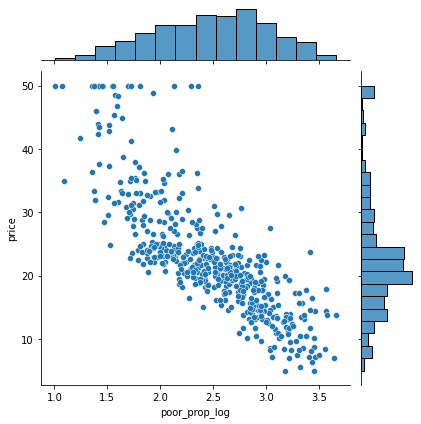

In [50]:
#Price vs poor_prop graph is an exp curve
Data_house_price['poor_prop_log'] = np.log(1 + Data_house_price['poor_prop'])
scatter_price_vs_poor_prop_log = sns.jointplot(x='poor_prop_log', y = 'price', data=Data_house_price)

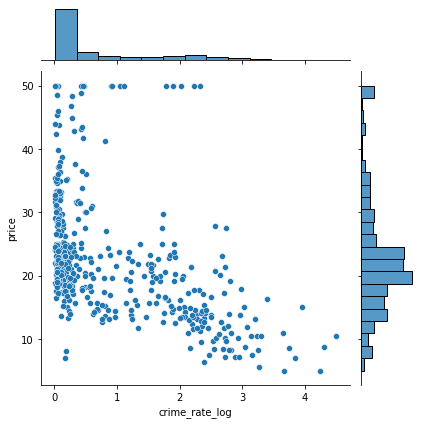

In [51]:
#Price vs crime_rate graph is an exp curve
Data_house_price['crime_rate_log'] = np.log(1 + Data_house_price['crime_rate'])
scatter_price_vs_crime_rate_log = sns.jointplot(x='crime_rate_log', y = 'price', data=Data_house_price)

In [52]:
scatter_price_vs_crime_rate_log.savefig('Price vs log CR')
scatter_price_vs_poor_prop_log.savefig('Price vs Log PP')

In [53]:
corr_data_ = Data_house_price.corr().sort_values(by = 'price',ascending=False)
print(corr_data_['price'])

price             1.000000
room_num          0.696304
teachers          0.505655
dist1             0.251355
airport_YES       0.182867
n_hos_beds        0.108513
airport_NO       -0.182867
age              -0.377999
crime_rate       -0.389582
parks            -0.391574
air_qual         -0.429300
crime_rate_log   -0.466527
resid_area       -0.484754
poor_prop        -0.740836
poor_prop_log    -0.813626
Name: price, dtype: float64


In [54]:
Data_house_price.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,teachers,poor_prop,n_hos_beds,parks,airport_NO,airport_YES,poor_prop_log,crime_rate_log
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,21.544466,12.653063,7.901336,0.054454,0.448617,0.551383,2.475610,0.813418
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.164946,7.141062,1.464992,0.010632,0.497845,0.497845,0.539033,1.022731
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,18.000000,1.730000,5.268000,0.033292,0.000000,0.000000,1.004302,0.006300
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,19.800000,6.950000,6.659000,0.046464,0.000000,0.000000,2.073162,0.078853
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,20.950000,11.360000,7.999000,0.053507,0.000000,1.000000,2.514464,0.228336
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,22.600000,16.955000,9.076000,0.061397,1.000000,1.000000,2.887869,1.542674
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,27.400000,37.970000,10.876000,0.086711,1.000000,1.000000,3.662792,4.499545


In [55]:
cols_to_del = ['crime_rate', 'poor_prop']
Data_house_price.drop(columns= cols_to_del, inplace= True)
del cols_to_del

In [56]:
Data_house_price.head()

,price,resid_area,air_qual,room_num,age,dist1,teachers,n_hos_beds,parks,airport_NO,airport_YES,poor_prop_log,crime_rate_log
0,24.0,32.31,0.538,6.575,65.2,4.35,24.7,5.480,0.049347,0,1,1.788421,0.006300
1,21.6,37.07,0.469,6.421,78.9,4.99,22.2,7.332,0.046146,1,0,2.316488,0.026944
2,34.7,37.07,0.469,7.185,61.1,5.03,22.2,7.394,0.045764,1,0,1.615420,0.026924
3,33.4,32.18,0.458,6.998,45.8,6.21,21.3,9.268,0.047151,0,1,1.371181,0.031857
4,36.2,32.18,0.458,7.147,54.2,6.16,21.3,8.824,0.039474,1,0,1.845300,0.066770


In [57]:
Data_house_price.to_csv("Clean Data.csv")